# 1. MODULO

In [18]:
# Importa el módulo 'os' para interactuar con el sistema de archivos y rutas del sistema operativo
import os

# Importa 'pandas' como 'pd', una biblioteca potente para manipulación y análisis de datos mediante DataFrames
import pandas as pd

# Importa el módulo 'datetime' para trabajar con fechas y horas de manera eficiente
import datetime

# 2. Rutas

In [19]:
R_Consoliado_Sat = r"C:\Users\anthonycaicedo\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\BaseD\CONSOLIDADO_SAT_RC.TXT"
R_Historico = r"C:\Users\anthonycaicedo\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\BaseD\Historico\HISTORIA_IDENTIFICACION.TXT"
R_Maestro = r"C:\Users\anthonycaicedo\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\BaseD\Maestro.txt"

Consolidado_Salida = "CS_Sat_RC.XLSX"
R_SALIDA = Fr"C:\Users\anthonycaicedo\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\BaseD\{Consolidado_Salida}"

# 3. CARGUE DATAFRAME

In [20]:
df_sat = pd.read_csv(R_Consoliado_Sat, sep='|', encoding='ansi', dtype=str)
df_sat.head()

,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,COL10,...,COL333,COL334,COL335,COL336,COL337,COL338,COL339,COL340,COL341,COL342
0,01-01-2025,3,14,069CC119278462931122024101800002,2024-12-31T10:24:49,NaN,NaN,NaN,CC,1192784629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10-01-2025,3,14,069CC111655113809012025130200001,2025-01-09T13:03:21,NaN,NaN,NaN,CC,1116551138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10-01-2025,4,14,069CC3364704509012025130200003,2025-01-09T13:18:41,NaN,NaN,NaN,CC,33647045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10-01-2025,5,4,069CC111604148609012025132300002,2025-01-09T13:37:12,NaN,NaN,NaN,CC,1116041486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10-01-2025,6,14,069CC111604148609012025132300002,2025-01-09T13:37:13,NaN,NaN,NaN,CC,1116041486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_HI = pd.read_csv(R_Historico, sep=',', encoding='UTF-8', dtype=str, header=None)
df_HI.head()

,0,1,2,3,4,5
0,114189514,TI,1118575186,31/12/2024,31/12/2999,EPSC25
1,98302734,CC,1115854149,24/11/2008,31/12/2999,EPSC25
2,72242905,CC,47439480,04/01/2001,31/12/2999,EPSC25
3,71669292,CC,47438450,29/06/2006,31/12/2999,EPSC25
4,41982118,CC,39950202,16/12/2001,31/12/2999,EPSC25


In [22]:
df_Maestro = pd.read_csv(R_Maestro, sep=',', encoding='ansi', dtype=str)
df_Maestro.head()

,AFL_ID,ENT_ID,TPS_IDN_ID_CF,HST_IDN_NUMERO_IDENTIFICACION_CF,TPS_IDN_ID,HST_IDN_NUMERO_IDENTIFICACION,AFL_PRIMER_APELLIDO,AFL_SEGUNDO_APELLIDO,AFL_PRIMER_NOMBRE,AFL_SEGUNDO_NOMBRE,...,CND_AFL_FECHA_INICIO,CND_AFL_FECHA_INICIO_2,GRP_FML_COTIZANTE_ID,PORTABILIDAD,COD_IPS_P,MTDLG_G_P,SUB_SISBEN_IV,MARCASISBENIV+MARCASISBENIII,CRUCE_BDEX_RNEC,fecha_maestro
0,39533052,EPSC25,NaN,NaN,CC,1054146060,GONZALEZ,ACERO,ANDRES,FELIPE,...,23/01/2025,NaN,-1,0,850100019001,NaN,NaN,SIV(A04),0,30/01/2025
1,90278075,EPSC25,NaN,NaN,CC,9430563,CHAPARRO,PATIÑO,JOSE,LIBARDO,...,15/01/2025,NaN,-1,0,850010014401,NaN,NaN,SIV(D06),0,30/01/2025
2,72302384,EPSC25,NaN,NaN,CC,74853100,DEDIOS,RODRIGUEZ,ELMER,NaN,...,28/01/2025,NaN,-1,0,854000042207,NaN,NaN,SIV(B02),0,30/01/2025
3,90268659,EPSC25,NaN,NaN,CC,1118648555,MORALES,TOCARIA,SUSANA,NaN,...,25/01/2025,NaN,-1,0,851250042210,NaN,NaN,SIV(A03),0,30/01/2025
4,71749224,EPSC25,NaN,NaN,CC,23739682,CORONADO,NaN,AURA,MARIA,...,05/09/2024,NaN,-1,0,NaN,NaN,NaN,SIV(B05),0,30/01/2025


# 4. LIMPIEZA DE DATOS

En esta sección, realizaremos un proceso de limpieza de datos para identificar inconsistencias y columnas que posiblemente no sean necesarias para el análisis. Esto incluye:

- Análisis de columnas vacías.
- Análisis de columnas de fechas.
- Identificación de posibles errores de tipificación.

## 4.1 Análisis de Columnas Vacías

En esta subsección, identificaremos las columnas que tienen un alto porcentaje de valores vacíos. Esto nos ayudará a decidir si estas columnas son relevantes para el análisis o si pueden ser eliminadas.

In [23]:
# Identificar posibles errores de tipificación
def identificar_errores_tipificacion(df):
    for col in df.columns:
        if df[col].dtype == "object":
            try:
                df[col].astype(float)
                print(f"Posible error: La columna '{col}' contiene valores numéricos pero está tipificada como texto.")
            except ValueError:
                pass
        elif df[col].dtype in ["int64", "float64"]:
            if df[col].apply(lambda x: isinstance(x, str)).any():
                print(f"Posible error: La columna '{col}' contiene texto pero está tipificada como numérica.")

# Aplicar la función al DataFrame
identificar_errores_tipificacion(df_sat)

Posible error: La columna 'COL2' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL3' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL6' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL7' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL10' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL17' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL22' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL31' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL32' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL38' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL39' contiene valores numéricos per

## Análisis de Columnas de Fechas

En esta subsección, verificaremos las columnas que contienen fechas para identificar valores fuera de rango o inconsistencias en el formato.

In [24]:
# Identificar columnas de tipo fecha
def analizar_columnas_fechas(df):
    columnas_fecha = [col for col in df.columns if "fecha" in col.lower()]
    for col in columnas_fecha:
        print(f"Análisis de la columna: {col}")
        print(f"Rango de fechas: {df[col].min()} - {df[col].max()}")
        print(f"Valores únicos: {df[col].nunique()}")

# Aplicar la función al DataFrame
analizar_columnas_fechas(df_sat)

## Identificación de Errores de Tipificación

En esta subsección, revisaremos las columnas para identificar posibles errores de tipificación, como valores numéricos en columnas categóricas o texto en columnas numéricas.

In [25]:
# Calcular el porcentaje de valores vacíos por columna
def calcular_porcentaje_vacios(df):
    porcentaje_vacios = df.isnull().mean() * 100
    return porcentaje_vacios

# Aplicar la función al DataFrame y mostrar las columnas con más del 50% de valores vacíos
porcentaje_vacios = calcular_porcentaje_vacios(df_sat)
columnas_vacias = porcentaje_vacios[porcentaje_vacios > 50]

print("Columnas con más del 50% de valores vacíos:")
print(columnas_vacias)

Columnas con más del 50% de valores vacíos:
COL6      100.000000
COL7       99.837134
COL8       94.169381
COL35      85.537459
COL44      96.775244
             ...    
COL338    100.000000
COL339    100.000000
COL340     99.967427
COL341     99.967427
COL342     99.934853
Length: 279, dtype: float64


## Eliminacion de Columnas Vacias

In [26]:
# Mostrar número de registros y columnas antes de eliminar
print("Antes de eliminar:")
print(f"Registros: {df_sat.shape[0]}, Columnas: {df_sat.shape[1]}")

# Eliminar columnas con más del 50% de valores vacíos
df_sat_limpio = df_sat.drop(columns=columnas_vacias.index)

# Mostrar número de registros y columnas después de eliminar
print("Después de eliminar:")
print(f"Registros: {df_sat_limpio.shape[0]}, Columnas: {df_sat_limpio.shape[1]}")

Antes de eliminar:
Registros: 3070, Columnas: 342
Después de eliminar:
Registros: 3070, Columnas: 63


## VALIDAR EVOLUCIONES DC

In [27]:
# Mostrar número de registros vacíos en COL23 y COL24 antes del proceso
vacios_antes_col23 = df_sat_limpio['COL23'].isnull().sum() + (df_sat_limpio['COL23'].str.strip() == '').sum()
vacios_antes_col24 = df_sat_limpio['COL24'].isnull().sum() + (df_sat_limpio['COL24'].str.strip() == '').sum()
print(f"Registros vacíos en COL23 antes: {vacios_antes_col23}")
print(f"Registros vacíos en COL24 antes: {vacios_antes_col24}")

# Copiar valores de COL21 y COL22 a COL23 y COL24 cuando estén vacías
mask_col23 = df_sat_limpio['COL23'].isnull() | (df_sat_limpio['COL23'].str.strip() == '')
mask_col24 = df_sat_limpio['COL24'].isnull() | (df_sat_limpio['COL24'].str.strip() == '')

if 'COL21' in df_sat.columns and 'COL22' in df_sat.columns:
    df_sat_limpio.loc[mask_col23, 'COL23'] = df_sat.loc[df_sat_limpio.index[mask_col23], 'COL21']
    df_sat_limpio.loc[mask_col24, 'COL24'] = df_sat.loc[df_sat_limpio.index[mask_col24], 'COL22']

# Mostrar número de registros vacíos en COL23 y COL24 después del proceso
vacios_despues_col23 = df_sat_limpio['COL23'].isnull().sum() + (df_sat_limpio['COL23'].str.strip() == '').sum()
vacios_despues_col24 = df_sat_limpio['COL24'].isnull().sum() + (df_sat_limpio['COL24'].str.strip() == '').sum()
print(f"Registros vacíos en COL23 después: {vacios_despues_col23}")
print(f"Registros vacíos en COL24 después: {vacios_despues_col24}")

Registros vacíos en COL23 antes: 91
Registros vacíos en COL24 antes: 91
Registros vacíos en COL23 después: 0
Registros vacíos en COL24 después: 0


## DEFINIR COLUMNAS

In [28]:
# Mostrar dimensiones antes de seleccionar columnas
print("Dimensiones antes:", df_sat_limpio.shape)

# Seleccionar las columnas requeridas (corrigiendo el espacio en 'COL 18')
columnas_a_trabajar = ['COL1', 'COL3', 'COL16', 'COL18', 'COL23', 'COL24', 'COL64']
df_sat_limpio = df_sat_limpio[columnas_a_trabajar]

# Mostrar dimensiones después de seleccionar columnas
print("Dimensiones después:", df_sat_limpio.shape)

Dimensiones antes: (3070, 63)
Dimensiones después: (3070, 7)


## QUITAR DUPLICADOS

In [29]:
# Mostrar el DataFrame antes de eliminar duplicados y vacíos
print("Antes de eliminar duplicados y vacíos:")
print(df_sat_limpio.shape)

# Eliminar filas donde COL23 o COL24 estén vacíos (NaN o cadena vacía)
df_sat_limpio = df_sat_limpio.dropna(subset=['COL23', 'COL24'])
df_sat_limpio = df_sat_limpio[(df_sat_limpio['COL23'].str.strip() != '') & (df_sat_limpio['COL24'].str.strip() != '')]

# Eliminar duplicados considerando COL23 y COL24 como ID
df_sat_limpio = df_sat_limpio.drop_duplicates(subset=['COL23', 'COL24'])

# Mostrar el DataFrame después del proceso
print("Después de eliminar duplicados y vacíos:")
print(df_sat_limpio.shape)

Antes de eliminar duplicados y vacíos:
(3070, 7)
Después de eliminar duplicados y vacíos:
(1590, 7)


## ELM DE MOVILIDAD

In [30]:
# Mostrar dimensiones antes de eliminar registros
print("Dimensiones antes de eliminar registros:", df_sat_limpio.shape)

# Eliminar registros donde (COL16 = 'EPSC25' y COL18 = 'EPS025') o (COL16 = 'EPS025' y COL18 = 'EPSC25')
condicion = ((df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'] == 'EPS025')) | \
            ((df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'] == 'EPSC25'))
df_sat_limpio = df_sat_limpio[~condicion]

# Mostrar dimensiones después de eliminar registros
print("Dimensiones después de eliminar registros:", df_sat_limpio.shape)

Dimensiones antes de eliminar registros: (1590, 7)
Dimensiones después de eliminar registros: (1368, 7)


## CATEGORIZAR BD

In [31]:
# Mostrar dimensiones antes de crear la columna
print("Dimensiones antes:", df_sat_limpio.shape)

# Crear la columna 'tipo_Proceso' según las condiciones dadas
cond_entrada_1 = (df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'].isnull())
cond_entrada_2 = (df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'].str.strip() == '')
cond_entrada_3 = (df_sat_limpio['COL16'] != 'EPSC25') & (df_sat_limpio['COL18'] == 'EPSC25')

cond_entrada = cond_entrada_1 | cond_entrada_2 | cond_entrada_3
cond_salida = (df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'] != 'EPSC25') & (~df_sat_limpio['COL18'].isnull()) & (df_sat_limpio['COL18'].str.strip() != '')

df_sat_limpio['tipo_Proceso'] = None
df_sat_limpio.loc[cond_entrada, 'tipo_Proceso'] = 'Entradas'
df_sat_limpio.loc[cond_salida, 'tipo_Proceso'] = 'Salidas'

# Mostrar dimensiones después de crear la columna
print("Dimensiones después:", df_sat_limpio.shape)

# Mostrar porcentaje de cada categoría y verificar si hay registros sin categoría
porcentaje_categorias = df_sat_limpio['tipo_Proceso'].value_counts(dropna=False, normalize=True) * 100
print("Porcentaje de categorías en 'tipo_Proceso':")
print(porcentaje_categorias)

Dimensiones antes: (1368, 7)
Dimensiones después: (1368, 8)
Porcentaje de categorías en 'tipo_Proceso':
tipo_Proceso
Salidas     92.47076
Entradas     7.52924
Name: proportion, dtype: float64


## ID BDUA

In [34]:
# Mostrar dimensiones antes de agregar la columna
print("Dimensiones antes:", df_sat_limpio.shape)

# Crear un nuevo identificador único combinando las columnas 1 y 2 de df_HI
df_HI['unique_id'] = df_HI[1].str.strip() + " " + df_HI[2].str.strip()

# Crear un diccionario para mapear el identificador único al serial (columna 0)
id_to_serial = df_HI.set_index('unique_id')[0].to_dict()

# Crear un nuevo identificador único combinando las columnas COL23 y COL24 de df_sat_limpio
df_sat_limpio['unique_id'] = df_sat_limpio['COL23'].str.strip() + " " + df_sat_limpio['COL24'].str.strip()

# Asignar la columna 'serial' en df_sat_limpio usando el identificador único
df_sat_limpio['serial'] = df_sat_limpio['unique_id'].map(id_to_serial)

# Mostrar dimensiones después de agregar la columna
print("Dimensiones después:", df_sat_limpio.shape)

# Calcular el porcentaje de vacíos en la nueva columna 'serial'
porcentaje_vacios_serial = df_sat_limpio['serial'].isnull().mean() * 100
print(f"Porcentaje de vacíos en la columna 'serial': {porcentaje_vacios_serial:.2f}%")

Dimensiones antes: (1368, 10)
Dimensiones después: (1368, 11)
Porcentaje de vacíos en la columna 'serial': 2.12%


# Agrupar df_Maestro por AFL_ID y obtener la fecha mínima y máxima de fecha_maestro
fechas_maestro = df_Maestro.groupby('AFL_ID')['fecha_maestro'].agg(['min', 'max']).reset_index()

# Crear un diccionario para acceso rápido
min_fechas = fechas_maestro.set_index('AFL_ID')['min'].to_dict()
max_fechas = fechas_maestro.set_index('AFL_ID')['max'].to_dict()

# Función para asignar la fecha según tipo_Proceso
def obtener_fec_maestro(row):
    serial = row['serial']
    if row['tipo_Proceso'] == 'Entradas':
        return min_fechas.get(serial, pd.NaT)
    elif row['tipo_Proceso'] == 'Salidas':
        return max_fechas.get(serial, pd.NaT)
    else:
        return pd.NaT

# Crear la columna 'fec_maestro' en df_sat_limpio
df_sat_limpio['fec_maestro'] = df_sat_limpio.apply(obtener_fec_maestro, axis=1)

# 5.VIZUALIACION DE DATOS

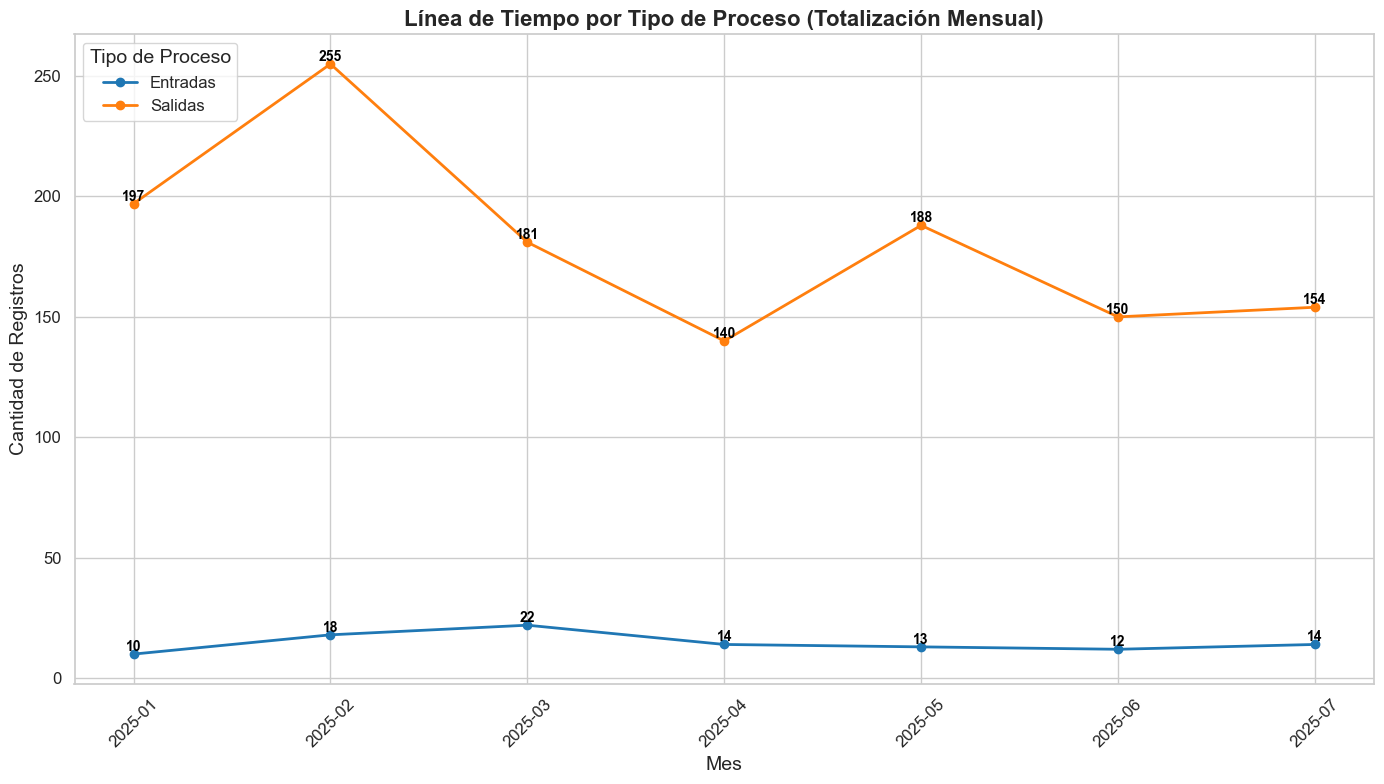

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna COL1 esté en formato de fecha
df_sat_limpio['COL1'] = pd.to_datetime(df_sat_limpio['COL1'], format='%d-%m-%Y', errors='coerce')

# Crear una nueva columna para el mes y año
df_sat_limpio['Mes_Año'] = df_sat_limpio['COL1'].dt.to_period('M')

# Agrupar por Mes_Año y tipo_Proceso, y contar los registros
totales_por_mes = df_sat_limpio.groupby(['Mes_Año', 'tipo_Proceso']).size().reset_index(name='Total')

# Pivotar los datos para que cada tipo_Proceso sea una columna
timeline = totales_por_mes.pivot(index='Mes_Año', columns='tipo_Proceso', values='Total').fillna(0)

# Configuración de estilo para gráficos
sns.set_theme(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 8))
palette = sns.color_palette("tab10")  # Paleta de colores

# Graficar cada tipo de proceso con un estilo único
for column, color in zip(timeline.columns, palette):
    plt.plot(timeline.index.astype(str), timeline[column], marker='o', label=column, color=color, linewidth=2)
    # Añadir etiquetas de datos con mejor visibilidad
    for x, y in zip(timeline.index.astype(str), timeline[column]):
        plt.text(x, y, str(int(y)), fontsize=10, color='black', ha='center', va='bottom', fontweight='bold')

# Títulos y etiquetas
plt.title('Línea de Tiempo por Tipo de Proceso (Totalización Mensual)', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Registros', fontsize=14)

# Personalización de ejes
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Leyenda
plt.legend(title='Tipo de Proceso', fontsize=12, title_fontsize=14, loc='upper left')

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()